In [1]:
# DATA_FOLDER = 'f:\\rsna-miccai-brain-tumor-radiogenomic-classification'

import pathlib
import pydicom
from matplotlib import pyplot as plt

filePath = pathlib.Path('F:\\rsna-miccai-brain-tumor-radiogenomic-classification\\train')

subs = [i for i in filePath.iterdir()]
subs

[WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00000'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00002'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00003'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00005'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00006'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00008'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00009'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00011'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00012'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00014'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/00017'),
 WindowsPath('F:/rsna-miccai-brain-tumor-radiogenomic-classification/train/0

In [16]:
def save_fig(fig, fig_id, atype, patientname, tight_layout=True, fig_extension="png", resolution=300):
    pathlib.Path(".\\pics\\" + patientname + "\\" + atype).mkdir(parents=True, exist_ok=True)
    pathobj = ".\\pics\\" + f"{patientname}\\{atype}\\{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.imshow(pydicom.dcmread(fig).pixel_array, cmap=plt.cm.bone)
    plt.axis('off')
    plt.savefig(pathobj, format=fig_extension, dpi=resolution)
    plt.close()




for patient in filePath.iterdir():
    if patient.name == "00000":
        for type in patient.iterdir():
            for pic in type.iterdir():
                save_fig(str(pic), pic.name, type.name, patient.name)

print("no")



no


In [13]:
instance = pathlib.Path('f:\\rsna-miccai-brain-tumor-radiogenomic-classification\\train\\00000')

num=0

for i in instance.iterdir():
    for file in i.iterdir():
        num += (file.suffix == '.dcm')

num

970

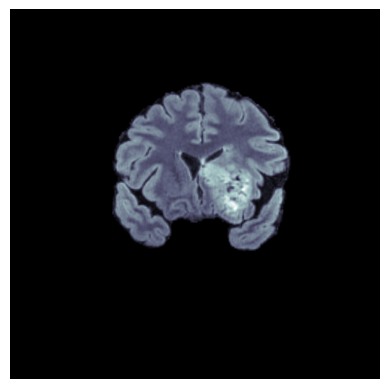

In [40]:
from random import randint

index = randint(0, 399)

flair = list(instance.iterdir())[0]
pic = list(flair.iterdir())[index]

dcm = pydicom.dcmread(str(pic))

image = dcm.pixel_array
plt.imshow(image, cmap=plt.cm.bone)
plt.axis('off')
plt.show()

In [42]:
pydicom.dcmread(str(list(flair.iterdir())[0])).pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [3]:
import torch

liste = list()
for i in range(5):
    liste.append(torch.randn(2, 3))


torch.stack(liste)

tensor([[[ 0.0230,  1.4866,  0.2721],
         [ 0.1048,  0.4783,  0.8752]],

        [[-0.4609,  0.0202, -0.1435],
         [ 0.5478,  1.4021, -0.1023]],

        [[ 0.9005, -0.6437, -0.6490],
         [ 1.2058,  0.2223, -0.6753]],

        [[-0.1106,  0.8652,  0.6331],
         [ 0.5195,  0.0785, -0.2703]],

        [[ 0.9424,  0.7778, -0.9633],
         [-2.5844,  0.6344, -0.4296]]])

In [2]:
import pandas as pd

file = pd.read_csv('F:\\rsna-miccai-brain-tumor-radiogenomic-classification\\train_labels.csv')

file[file.columns[1]]

0      1
1      1
2      0
3      1
4      1
      ..
580    1
581    1
582    1
583    0
584    0
Name: MGMT_value, Length: 585, dtype: int64

In [1]:
from dataset import RSNADataset
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from pathlib import Path

transforms = transforms.Compose((transforms.Resize(224), transforms.Normalize(mean=[0.485,0.456, 0.406], std=[0.229, 0.224, 0.225])))

trainDataset = RSNADataset(Path("F:\\brain-tumor-target\\reorganized"), Path.cwd().parent / "train_labels.csv", "train", 0.118, transform=transforms)
valDataset = RSNADataset(Path("F:\\brain-tumor-target\\reorganized"), Path.cwd().parent / "train_labels.csv", "val", 0.118, transform=transforms)


In [2]:
dloader = DataLoader(trainDataset, batch_size=10, shuffle=True)
val = DataLoader(valDataset, batch_size=10, shuffle=True)

In [3]:
for a in dloader:
    print(a)
    break

C:\Users\yigit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


[tensor([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],

         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
          [-1.8044, -1.8044, 

In [22]:
import torch.nn as nn
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights

modelf = efficientnet_b0(EfficientNet_B0_Weights(EfficientNet_B0_Weights.IMAGENET1K_V1))
for layer in modelf.children():
    layer.requires_grad_ = False

model = nn.Sequential(*list(modelf.children())[:-1], nn.LazyLinear(2, bias=True))

for input, label in dloader:
    pred = model(input)
    print(pred)
    print(label)
    loss_fn = nn.CrossEntropyLoss()
    loss = loss_fn(pred, label)
    print(loss)
    break


C:\Users\yigit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torchvision\models\_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
C:\Users\yigit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torch\nn\modules\lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '
C:\Users\yigit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), Ra

tensor([[[[0.4082, 0.6171]],

         [[0.3703, 0.5666]],

         [[0.3836, 0.5843]],

         ...,

         [[0.8361, 1.1874]],

         [[0.4435, 0.6641]],

         [[0.4565, 0.6815]]],


        [[[0.5608, 0.8205]],

         [[0.4266, 0.6417]],

         [[0.7784, 1.1105]],

         ...,

         [[0.5960, 0.8674]],

         [[0.4058, 0.6139]],

         [[0.5380, 0.7901]]],


        [[[0.7807, 1.1136]],

         [[0.8814, 1.2477]],

         [[1.0550, 1.4791]],

         ...,

         [[0.3472, 0.5359]],

         [[0.5118, 0.7552]],

         [[0.5692, 0.8317]]],


        ...,


        [[[0.8635, 1.2240]],

         [[0.5495, 0.8055]],

         [[0.4985, 0.7375]],

         ...,

         [[0.3892, 0.5918]],

         [[0.4138, 0.6247]],

         [[0.5718, 0.8352]]],


        [[[0.3708, 0.5673]],

         [[0.5534, 0.8106]],

         [[0.3588, 0.5513]],

         ...,

         [[0.4116, 0.6217]],

         [[0.5519, 0.8086]],

         [[0.3931, 0.5970]]],




RuntimeError: only batches of spatial targets supported (3D tensors) but got targets of dimension: 2